<a href="https://colab.research.google.com/github/sarathsoman14/sarathsoman14-Hotel-Booking-Exploratory-Data-Analysis-EDA-/blob/main/Hotel_Booking_Exploratory_Data_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
# Read csv file
path='/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Exploratory Data Analysis (EDA)/Hotel Booking/Master File-Github/'
df=pd.read_csv(path + 'Hotel Bookings.csv')

In [29]:
# Checking the dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [31]:
# Making a copy to work on,to make sure raw file remain intact
hotel_df=df.copy()
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [32]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [33]:
# # DATA CLEANING
# Checking for duplicates
duplicate_rows=hotel_df[hotel_df.duplicated()]
duplicate_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [34]:
duplicate_rows.shape
print('Number of duplicated rows are:',duplicate_rows.shape)

Number of duplicated rows are: (31994, 32)


In [35]:
# Droping the duplicated rows
hotel_df=hotel_df.drop_duplicates()
hotel_df.shape

(87396, 32)

In [36]:
# Checking for null values
hotel_df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [37]:
hotel_df.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [38]:
# As we can clearly see that there are null values in column :
# company                           82137
# agent                             12193
# country                             452
# children                              4

In [39]:
# ASSUMPTIONS TAKEN
# 452 null values in country can be taken  as "others"
# Column company,agent have very high number of null values and there is no value that we can assign as their data are in number which is not making sense.
# Column children have very less null values so droping them would not affect the analysis
# Therefore,dropping all the null values in column company,agent and children and assigning 'others' to column country.


In [40]:
# Assigning null values in column country as 'others'.
hotel_df['country'].fillna('others',inplace=True)

In [41]:
hotel_df['country'].isna().sum()

0

In [44]:
hotel_df.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
children                              4
hotel                                 0
previous_cancellations                0
reservation_status                    0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
country                               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [45]:
# Dropping colunns agent and company
hotel_df.drop(['agent','company'],axis=1,inplace=True)

In [49]:
hotel_df.count()

hotel                             87396
is_canceled                       87396
lead_time                         87396
arrival_date_year                 87396
arrival_date_month                87396
arrival_date_week_number          87396
arrival_date_day_of_month         87396
stays_in_weekend_nights           87396
stays_in_week_nights              87396
adults                            87396
children                          87392
babies                            87396
meal                              87396
country                           87396
market_segment                    87396
distribution_channel              87396
is_repeated_guest                 87396
previous_cancellations            87396
previous_bookings_not_canceled    87396
reserved_room_type                87396
assigned_room_type                87396
booking_changes                   87396
deposit_type                      87396
days_in_waiting_list              87396
customer_type                     87396


In [ ]:
# Since,data is cleaned .we can proceed with EDA
# EDA

In [51]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [53]:
# First Analysing the hotel by customers preference.
most_prefered_hotel=hotel_df['hotel'].value_counts()
most_prefered_hotel

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

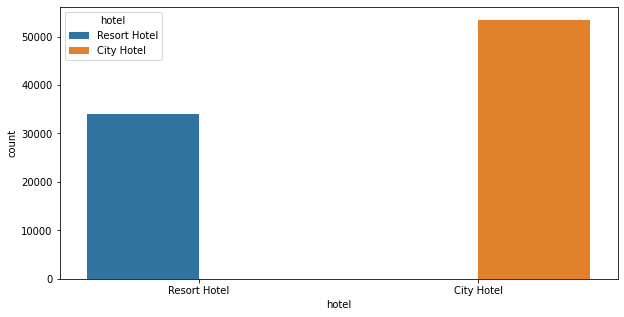

In [59]:
# Visualization
plt.figure(figsize=(10,5))
sns.countplot(x='hotel',hue='hotel',data=hotel_df)

In [56]:
most_prefered_hotel_perecent_distribution=hotel_df['hotel'].value_counts(normalize=True)
most_prefered_hotel_perecent_distribution

City Hotel      0.611332
Resort Hotel    0.388668
Name: hotel, dtype: float64

In [ ]:
# As we can se most prefered hotel by customer is City Hotel

Text(0, 0.5, 'City Hotel')

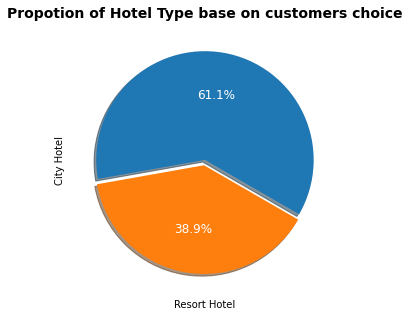

In [58]:
# Visualization
plt.figure(figsize=(10,5))
plt.pie(most_prefered_hotel_perecent_distribution,startangle=330,explode=(0,0.05),autopct='%1.1f%%' ,textprops={'color':"w",'fontsize':12},shadow=True)
plt.title('Propotion of Hotel Type base on customers choice',fontsize=14,weight='bold')
plt.xlabel('Resort Hotel')
plt.ylabel('City Hotel')

In [ ]:
# City hotel hold 61.1% customers